# Module 1.0 - introduction

Load this jupyter notebook from the cantera binder: https://cantera.org or from your local jupyter+cantera installation. You can execute a selected cell by pressing the 'play' button above or by pressing *Shift* + *Enter* on the keyboard. Remember to save your work using the *download* option if you are working in the cloud. You can also still do this if you are logged out due to inactivity.

## Gas properties
This module is similar to the introduction tutorial from Cantera: 

https://cantera.org/tutorials/python-tutorial.html

We start by loading the important libraries from cantera and matplotlib. If loading cantera fails, you are not running from the cantera binder or you have not successfully installed cantera on your local machine.

In [1]:
%matplotlib inline
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np

We will create a gas mixture from an input file containing detailed chemical reactions for methane and air, the GRI 3.0 mechanism: http://combustion.berkeley.edu/gri-mech/version30/text30.html
This mechanism comes pre-installed with cantera. The quality of your results depend on the quality of the reaction mechanism, so be critical when selecting a mechanism for your own computations. Critical means: where does the mechanism come from, what is the range of applicability, was it validated and are the results published in a peer-reviewed journal?

In [2]:
gas = ct.Solution('gri30.cti')

Display the properties of the gas by simply calling the variable 

In [3]:
gas

Use parentheses (round brackets):

In [4]:
gas()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy           26470        5.336e+04     J
   internal energy     -1.2109e+06       -2.441e+06     J
           entropy           64914        1.309e+05     J/K
    Gibbs function     -1.9448e+07        -3.92e+07     J
 heat capacity c_p           14312        2.885e+04     J/K
 heat capacity c_v           10187        2.054e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7173
     [  +52 minor]              0                0



If you want to know more about the object, use help(object). This information is also online in the documentation,
https://cantera.org/documentation/docs-2.4/sphinx/html/cython/importing.html

Be prepared for a lot of information:

In [5]:
help(gas)

Help on Solution in module cantera.composite object:

class Solution(cantera._cantera.ThermoPhase, cantera._cantera.Kinetics, cantera._cantera.Transport)
 |  A class for chemically-reacting solutions. Instances can be created to
 |  represent any type of solution -- a mixture of gases, a liquid solution, or
 |  a solid solution, for example.
 |  
 |  Class `Solution` derives from classes `ThermoPhase`, `Kinetics`, and
 |  `Transport`.  It defines no methods of its own, and is provided so that a
 |  single object can be used to compute thermodynamic, kinetic, and transport
 |  properties of a solution.
 |  
 |  To skip initialization of the Transport object, pass the keyword argument
 |  ``transport_model=None`` to the `Solution` constructor.
 |  
 |  The most common way to instantiate `Solution` objects is by using a phase
 |  definition, species and reactions defined in an input file::
 |  
 |      gas = ct.Solution('gri30.cti')
 |  
 |  If an input file defines multiple phases, the p

The content of the python objects can be shown using dir()

In [6]:
dir(gas)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

Let's display density:

In [7]:
gas.density

0.08188905810274845

That's quite low, and if you look at the initial composition of the gas, you will see why. Check what is contained in the variables to get an impression. Let's now display the viscosity:

In [8]:
gas.viscosity

CanteraError: 
***********************************************************************
NotImplementedError thrown by Transport::viscosity:
Not implemented.
***********************************************************************


We cannot get the viscosity because we need to set a mixture and we need a model for the computation of mixture properties. Several models are available, from more accurate (and more expensive) to less accurate: **multi**, **mix**, **UnityLewis**
It is important to know which models are used because each model has it's own limitations and range of applicability.

How models and submodels are related for the transport class can be viewed here: 
https://cantera.org/documentation/docs-2.4/doxygen/html/d2/dfb/classCantera_1_1Transport.html

- **Multi** multicomponent diffusion model https://www.cantera.org/documentation/docs-2.1/doxygen/html/classCantera_1_1MultiTransport.html
- **Mix** mixture averaged model https://cantera.org/documentation/docs-2.4/doxygen/html/d9/d17/classCantera_1_1MixTransport.html
- **UnityLewis** unity lewis number https://cantera.org/documentation/docs-2.4/doxygen/html/d3/dd6/classCantera_1_1UnityLewisTransport.html

In [9]:
gas.transport_model = 'UnityLewis'
# Set TPX, the Temperature, the pressure and the mole fraction. 
# The mole fraction will be normalized, so the sum of your input values will be 1.0
gas.TPX = 298, 101325, 'CH4:1, O2:2'

We have set a mixing model, so Cantera can compute the mixture averaged properties like viscosity:

In [10]:
gas.viscosity

1.774771803936626e-05

In [11]:
gas.X

array([0.        , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Let's put density, thermal conductivity and heat capacity into the variables *rho*, *$\lambda$* and *cp*. Note that the thermal conductivity is called lambda ($\lambda$) in several text books, but lambda is a python command for an anonymous function:
https://www.programiz.com/python-programming/anonymous-function

This is why we will use *Lambda* with a capital *L*.

In [12]:
rho = gas.density
Lambda = gas.thermal_conductivity
cp = gas.cp_mass

We have the diffusion coefficients of each of the species available (why not a single value like viscosity?):

In [13]:
D = gas.mix_diff_coeffs_mass
print(D)

[2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05 2.26712245e-05 2.26712245e-05 2.26712245e-05
 2.26712245e-05]


The unity lewis number assumption means that $\frac{\lambda}{c_p} = \rho\cdot D$

In [14]:
print(Lambda/cp, rho*D[0])

2.4735970056741385e-05 2.4735970056741385e-05


So, what happens when we use a more advanced diffusion model? Let's try the mixture averaged model:

In [15]:
gas.transport_model = 'Mix'
# Set TPX, the temperature, the pressure and the mole fraction. 
# The mole fraction will be normalized, so the sum of your input mole fractions will be 1.0
gas.TPX = 298, 101325, 'CH4:0.095, O2:0.19, N2:0.715'
# using gas.TPX is equivalent to using gas.TP + gas.set_equivalence_ratio(phi, 'CH4', 'O2:1, N2:3.76')

In [16]:
gas.X

array([0.   , 0.   , 0.   , 0.19 , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.095, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.715, 0.   , 0.   , 0.   , 0.   , 0.   ])

In [17]:
rho = gas.density
Lambda = gas.thermal_conductivity
cp = gas.cp_mass

In [18]:
D = gas.mix_diff_coeffs_mass
print(D)

[7.71269175e-05 1.20408483e-04 3.22395573e-05 2.07786094e-05
 3.16323025e-05 2.24092676e-05 2.06025695e-05 2.04635712e-05
 3.04555788e-05 3.44837544e-05 2.28149483e-05 2.28149483e-05
 2.23049159e-05 2.21565212e-05 2.05666809e-05 1.56693022e-05
 1.55893669e-05 1.54618706e-05 1.53508837e-05 1.53508837e-05
 1.51693495e-05 1.67138228e-05 1.65440817e-05 1.63853919e-05
 1.59326652e-05 1.47929877e-05 1.46722214e-05 2.50830814e-05
 1.33394943e-05 1.33394943e-05 2.89124810e-05 3.39593012e-05
 3.32641253e-05 2.17972468e-05 2.03933337e-05 2.04102362e-05
 1.72843238e-05 1.55099788e-05 2.04813779e-05 2.04955158e-05
 1.52315631e-05 1.50932461e-05 2.50827040e-05 1.55782727e-05
 1.55782727e-05 1.55782727e-05 1.56509298e-05 2.09537221e-05
 1.98215032e-05 1.13899089e-05 1.13390897e-05 1.32776300e-05
 1.32183186e-05]


In [19]:
Le = Lambda/(rho*cp*D)
print(Le)

[0.28901405 0.18512618 0.69141032 1.07277451 0.70468353 0.99471178
 1.0819409  1.08928996 0.73191065 0.64641345 0.97702446 0.97702446
 0.99936546 1.00605877 1.08382887 1.42257532 1.42986964 1.44166014
 1.45208334 1.45208334 1.46946067 1.3336723  1.34735569 1.3604046
 1.3990605  1.50684655 1.51924933 0.8886772  1.67103506 1.67103506
 0.7709737  0.65639638 0.67011419 1.02264119 1.09304162 1.09213643
 1.28965199 1.43718846 1.08834292 1.08759217 1.46345864 1.47687001
 0.88869057 1.43088794 1.43088794 1.43088794 1.42424525 1.06380921
 1.12457478 1.95706241 1.96583351 1.67882088 1.68635386]


So as we can see, the assumptions of $Le=1$ does not hold for all species.

In [20]:
print("index of largest Lewis number is ",Le.argmax())
print("value of largest Lewis number is ",Le.max()) 
print("species with largest Lewis number is ",gas.species_names[Le.argmax()])

index of largest Lewis number is  50
value of largest Lewis number is  1.9658335088877457
species with largest Lewis number is  C3H8


Let's see how large the difference in Lewis number is for several different species

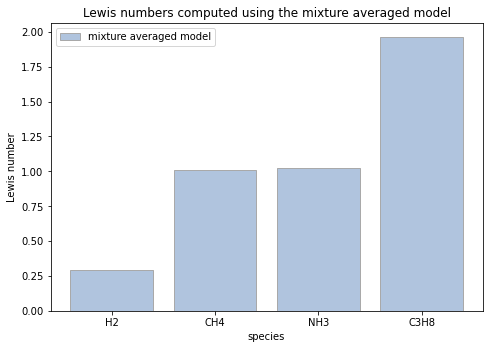

In [21]:
import matplotlib.pyplot as plt
Species=['H2','CH4','NH3','C3H8']
# list comprehension: returns the list [expression for item in list]
Le_mix = [Le[gas.species_index(le)] for le in Species]

# let's globally set the size of figures in inches
plt.rcParams["figure.figsize"] = (6,4)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('species')
plt.ylabel('Lewis number')
plt.title('Lewis numbers computed using the mixture averaged model')
labelList=["mixture averaged model"]
ax.bar(Species,Le_mix,color='lightsteelblue',edgecolor='darkgrey')
plt.legend(labelList)
plt.show()

Every figure should be accompanied by a descriptive text. The text should not just describe what is in the figure, but what **you** would like me to see in the figure. There should be some main, take-away message, some conclusion or statement that makes it clear why the figure was made. For instance, the bar graph above shows the Lewis number of 4 different species, computed using the mixture averaged diffusion model. Methane and ammonia have a Lewis number close to 1, so the thermal diffusion is equal to the mass diffusion. Hydrogen has a much lower Lewis number, meaning that mass diffusion is larger than thermal diffusion. Propane on the other hand has a much higher Lewis number, so for propane the thermal diffusion is larger than the mass diffusion. This is what we actually see in the figure. The main take-away message is: a unity Lewis number approach is accurate for methane and ammonia, but not for hydrogen and propane. There can be other take-away messages, for instance that hydrogen has the lowest Lewis number of all species and propane has the largest Lewis number of all species that appear in the GRI mechanism for methane-air. But to support that statement it would have been better to actually show all species Lewis numbers in the graph because that statement is not fully supported by just the bar graph above. To conclude: you have to adjust what you show in your figure to the statement/conclusion that you want to make. 

In [22]:
# save the figure. 
plt.savefig('bargraph_lewisnumber_mixingmodels.png')

<Figure size 432x288 with 0 Axes>

We can also plot the gas properties as a function of temperature. 

In [23]:
gas()


  gri30:

       temperature             298  K
          pressure          101325  Pa
           density         1.13006  kg/m^3
  mean mol. weight         27.6335  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.5659e+05        -7.09e+06     J
   internal energy     -3.4625e+05       -9.568e+06     J
           entropy          7240.4        2.001e+05     J/K
    Gibbs function     -2.4142e+06       -6.671e+07     J
 heat capacity c_p          1076.9        2.976e+04     J/K
 heat capacity c_v          775.97        2.144e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2           0.19         0.220015         -26.3344
               CH4          0.095        0.0551528         -54.8773
                N2          0.715         0.724832         -23.3685
     [  +50 minor]        

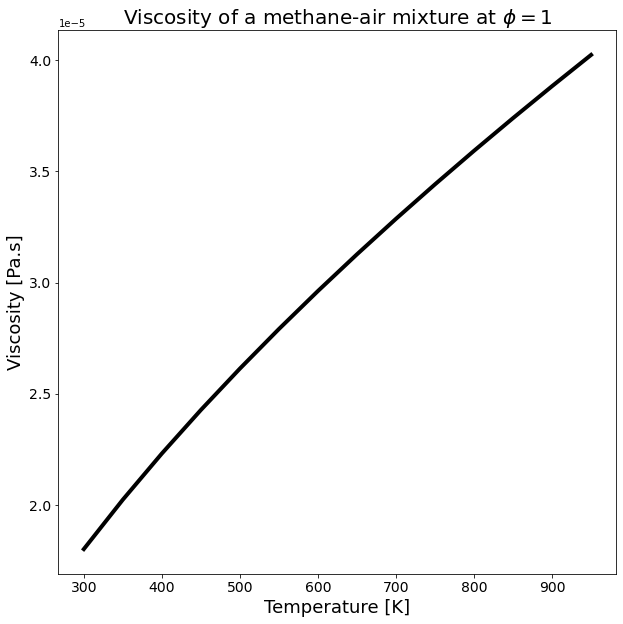

In [24]:
# define empty list of viscosities. 
viscosity=[]
temperature = np.arange(300,1000,50)
for T in temperature:
    gas.TP=T,101325
    viscosity.append(gas.viscosity) 
    
# create a figure with a size different than the global settings
plt.figure(figsize=(10,10))    
# note that when we use subplot, it creates 2 objects, fig and ax, 
# that can give us much more control over the figure, e.g. set size of the 
# tick marks, additional x-axis, ...
# fig, ax = plt.subplots()
# let's make a plot (will it be fit for the king?!?)
plt.plot(temperature,viscosity,color='black',linewidth=4,linestyle='-')
plt.xlabel('Temperature [K]',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Viscosity [Pa.s]',fontsize=18)
plt.yticks(fontsize=14)
plt.title('Viscosity of a methane-air mixture at $\phi=1$',fontsize=20)
# second line in the same plot
#plt.plot(temperature,viscosity2)
plt.show()

# Introduction to making the assignments
Create a new Python3 notebook and work out the assignment. Name your notebook *firstname_lastname_module_xx.ipynb* or *studentid_module_xx.ipynb*. Restart the notebook and run the entire notebook before uploading it to canvas. Use 'Download' instead of 'Save' to store your notebook so you have a local copy. The online session will save on the cloud server, so results will be lost after you close your session. Also note that the session will close after a period of inactivity. You can still download your notebook if this happens. See also the explanation here:

https://discourse.jupyter.org/t/getting-your-notebook-after-your-binder-has-stopped/3268

The main result of your assignment will be in the form of a figure and an accompanying description+explanation of the figure. 
Pay attention to the quality of the figure!
Graphs should always be completely self-explanatory, with clear axis labels, legends, and a title. A good figure can last a lifetime. Texts and any other details should be such that if you give your Nobel laureate lecture, the king of Sweden should be able to clearly see and appreciate your graph all the way from the back of the Stockholm Concert Hall. Make your graph fit for the king.

Pay attention to the quality of your description!
The description should tell me what the message of the figure is. What do I see in the figure? What do I learn from the figure? 

# Assignment 1.0:
- Set the mixture to the stoichiometric mixture of methane and pure air and show the Lewis numbers of [H2,CH4,NH3,C3H8] for the Unity Lewis model, the Mixture Averaged, and the Multicomponent Diffusion model in one bar graph. Increase the default font size for all text, including the labels (numbers) of the tick marks on the axes or else the king can not read it. In your scientific description, comment on the accuracy of the different models and their range of applicability.
- Change the mixture to an equivalence ratio of $\phi=0.5$ and show in a bar graph for the Lewis numbers and the above species the difference between equivalence ratio $\phi=0.5$ and a stoichiometric mixture. Use the mixture averaged diffusion model. You compare 2 equivalence ratios, so in your scientific description you should comment on the difference.
- Make 1 figure of the viscosity and 1 figure of the heat capacity as function of temperature. Show results for equivalence ratio $\phi=0.5$ and stoichiometric. Think about what you are comparing, and what conclusions you can draw from the comparison. Think about the main message of your figure. Your main message might be different from somebody else's main message.   
- Plot the mass diffusivity of hydrogen and methane as a function of temperature for $\phi=0.5$ and stoichiometric, all in a single figure. Use the Multicomponent Diffusion model. Comment on the applicability of the constant Lewis model.
- Give a scientific description of **all** your figures, explain what we see and why. 